In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


In [2]:
df = pd.read_csv('C:/Users/spam.csv', encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df[['v1','v2']]
df.columns = ['label', 'message']

In [4]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

In [6]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n🔹 {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return y_pred


In [8]:
nb_model = MultinomialNB()
pred_nb = train_and_evaluate(nb_model, X_train_tfidf, X_test_tfidf, y_train, y_test)


🔹 MultinomialNB
Accuracy: 0.9704035874439462
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [9]:
lr_model = LogisticRegression(max_iter=1000)
pred_lr = train_and_evaluate(lr_model, X_train_tfidf, X_test_tfidf, y_train, y_test)


🔹 LogisticRegression
Accuracy: 0.968609865470852
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [10]:
svm_model = LinearSVC()
pred_svm = train_and_evaluate(svm_model, X_train_tfidf, X_test_tfidf, y_train, y_test)


🔹 LinearSVC
Accuracy: 0.9829596412556054
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



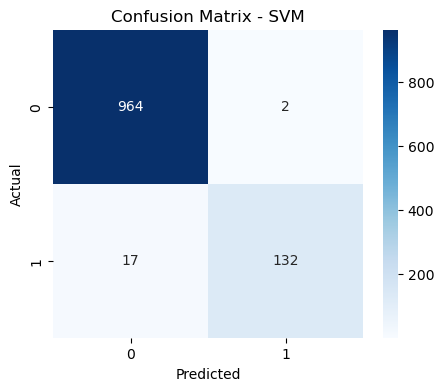

In [11]:
cm = confusion_matrix(y_test, pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()